In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [14]:
def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg

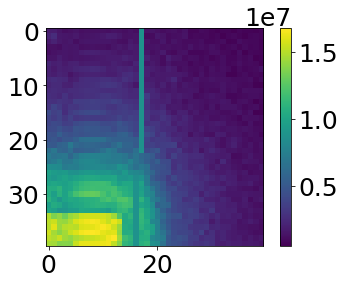

In [15]:
data = pd.read_pickle('asher_20230603_hyperspec_EL2_98.pkl')
im = data['im']
wavel = data['wavelength']
map = np.sum(im, axis = 2)
# pixel numbers x and y
px = len(im)
py = len(im[0])
intensity = np.zeros((px,py))
#total intensity plot
plt.imshow(map, cmap='viridis')
plt.colorbar()
# plt.xlabel('x axis')
# plt.ylabel('y axis')
plt.show()

### log scale plot

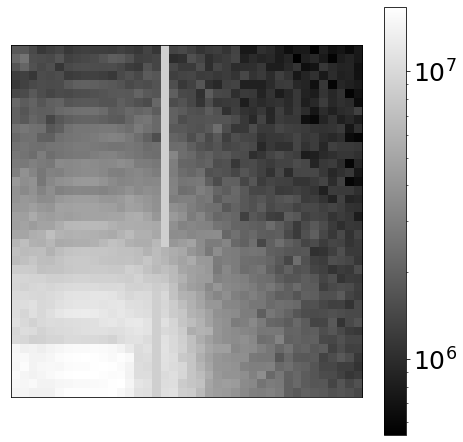

In [16]:
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
plt.imshow(map, cmap='gray', norm =LogNorm())
# plt.xlabel('Micrometer ($\mu$m)')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()
fig.savefig('no_bin.svg', format= 'svg',transparent=True)

### NV ZPL

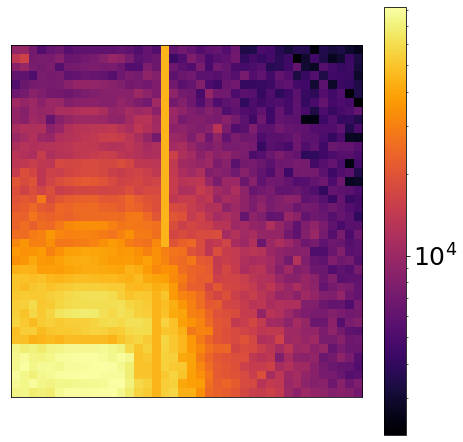

In [17]:
#bin selection min and max
binMin = 638.5
binMax = 639.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
#integrate over the bin
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()
#bin intensity plot
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
plt.imshow(intensity, cmap='inferno', norm =LogNorm())
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()
fig.savefig('nv_ZPL.svg', format= 'svg',transparent=True)


### Normalized SiV bin

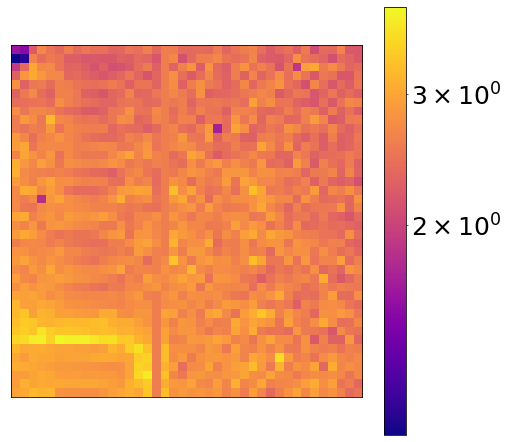

In [18]:
#bin selection min and max

intensity =  intensity = np.zeros((px,py))
binMin = 638.5
binMax = 639.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
#integrate over the bin
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()
binMin = 738
binMax = 740

argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)

#integrate over the bin with normalization
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()/intensity[i][j]


#bin intensity plot
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
plt.xticks([])
plt.yticks([])
plt.imshow(intensity, cmap='plasma', norm =LogNorm())
plt.colorbar()
plt.show()
fig.savefig('siv_normalize_nv_bin.svg', format= 'svg',transparent=True)

### Double Normalized 2nd Raman bin

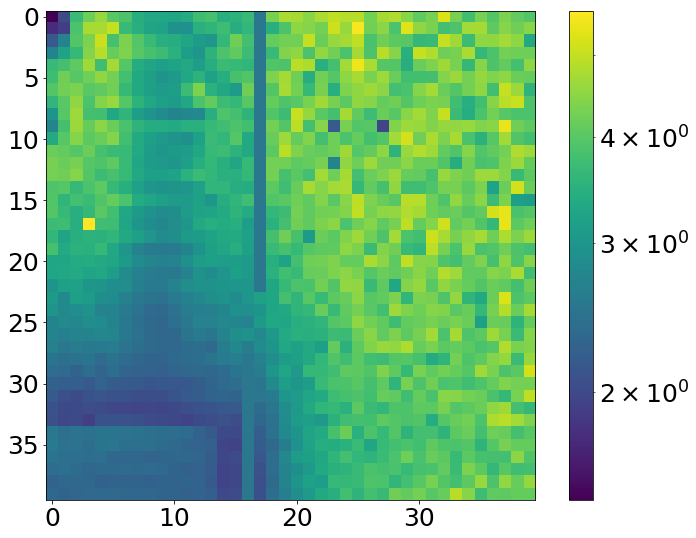

In [19]:
### Normalized SiV bin#bin selection min and max
intensity = np.zeros((px,py))
intensity2  = np.zeros((px,py))
binMin = 638.5
binMax = 639.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
#integrate over the bin
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()
        
binMin = 589.5
binMax = 590.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)

#integrate over the bin with normalization
for i in range(px):
    for j in range(py):
        intensity2[i][j] = im[i][j][argmin:argmax].sum()


binMin = 613
binMax = 614
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
for i in range(px):
    for j in range(py):
        intensity[i][j] = intensity[i][j]/intensity2[i][j]


#bin intensity plot
plt.figure(figsize=(12,9))
plt.imshow(intensity, cmap='viridis', norm =LogNorm())
plt.colorbar()
plt.show()

# bin raman with new defect

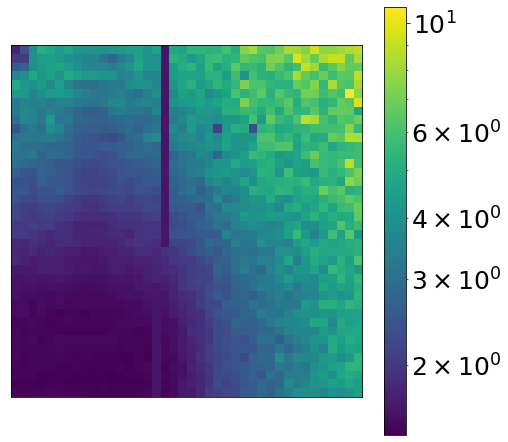

In [20]:
# bin ramann with new defect
### Normalized SiV bin#bin selection min and max
intensity =  intensity = np.zeros((px,py))
binMin = 589.5
binMax = 590.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
#integrate over the bin
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()
        
binMin = 613
binMax = 614

argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)

#integrate over the bin with normalization
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()/intensity[i][j]


#bin intensity plot
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
plt.xticks([])
plt.yticks([])
plt.imshow(intensity, cmap='viridis', norm =LogNorm())
plt.colorbar()
plt.show()
fig.savefig('raman_normalize_new_defect_bin.svg', format= 'svg',transparent=True)

# reverse

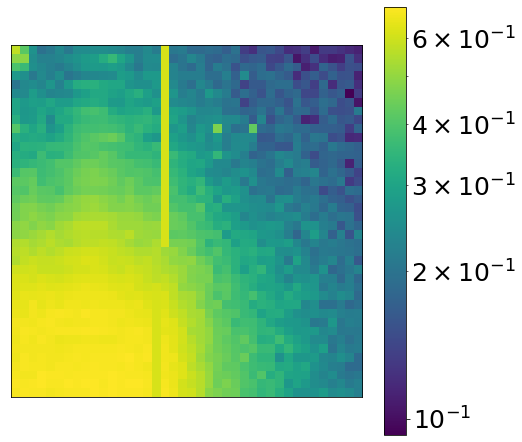

In [21]:
# bin ramann with new defect
### Normalized SiV bin#bin selection min and max
intensity =  intensity = np.zeros((px,py))
binMin = 589.5
binMax = 590.5
argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)
#integrate over the bin
for i in range(px):
    for j in range(py):
        intensity[i][j] = im[i][j][argmin:argmax].sum()
        
binMin = 613
binMax = 614

argmin = findarg(wavel, binMin)
argmax = findarg(wavel, binMax)

#integrate over the bin with normalization
for i in range(px):
    for j in range(py):
        intensity[i][j] = intensity[i][j]/im[i][j][argmin:argmax].sum()


#bin intensity plot
plt.rcParams.update({'font.size': 25})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 20*cm))
plt.xticks([])
plt.yticks([])
plt.imshow(intensity, cmap='viridis', norm =LogNorm())
plt.colorbar()
plt.show()